In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


import warnings


In [55]:
# Load the wine quality dataset
wine_data = pd.read_csv("/content/WineQT.csv")


In [56]:
df = wine_data.copy()
del df["Id"]
df["quality"] = df["quality"] - 3
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [58]:
wine_data.shape

(1143, 13)

In [59]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [60]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [61]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [62]:
wine_data.nunique().sort_values(ascending=True)

quality                    6
free sulfur dioxide       53
alcohol                   61
citric acid               77
residual sugar            80
pH                        87
sulphates                 89
fixed acidity             91
chlorides                131
volatile acidity         135
total sulfur dioxide     138
density                  388
Id                      1143
dtype: int64

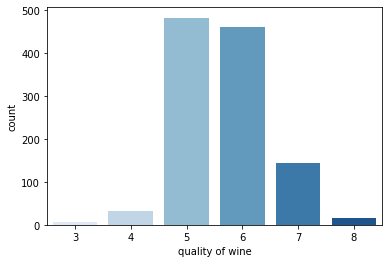

In [63]:
sns.countplot(x='quality', data=wine_data, palette='Blues')
plt.xlabel('quality of wine')
plt.show()

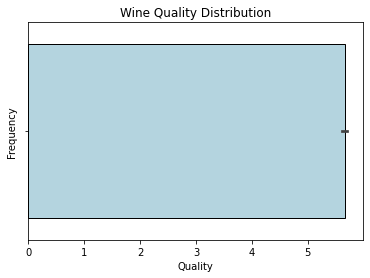

In [64]:
# Create a bar plot of the quality variable
sns.barplot(data=wine_data, x='quality', color='lightblue', edgecolor='black')

# Set the plot title and axis labels
plt.title("Wine Quality Distribution")
plt.xlabel("Quality")
plt.ylabel("Frequency")

# Show the plot
plt.show()

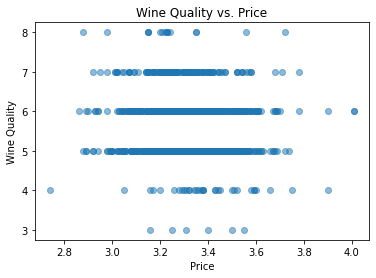

In [65]:
# Create a scatter plot of wine quality vs. price
plt.scatter(wine_data['pH'], wine_data['quality'], alpha=0.5)

# Add labels and titles
plt.xlabel('Price')
plt.ylabel('Wine Quality')
plt.title('Wine Quality vs. Price')

# Show the plot
plt.show()

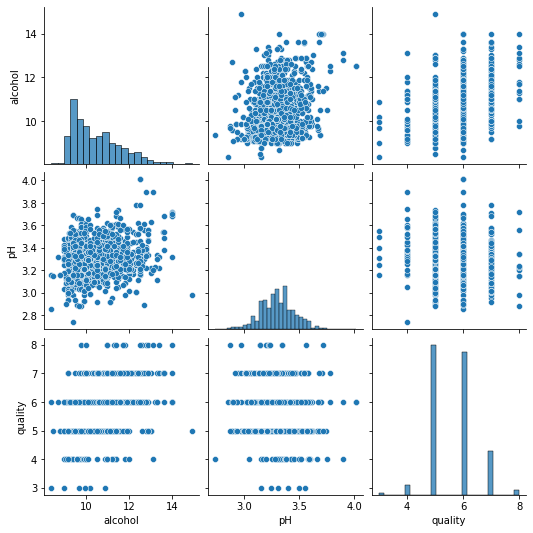

In [66]:
sns.pairplot(wine_data[['alcohol', 'pH', 'quality']])

In [67]:
corr_matrix = wine_data[['alcohol', 'pH', 'quality']].corr()

<Axes: >

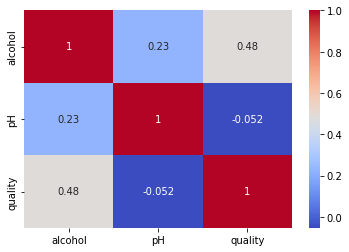

In [68]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<function matplotlib.pyplot.show(close=None, block=None)>

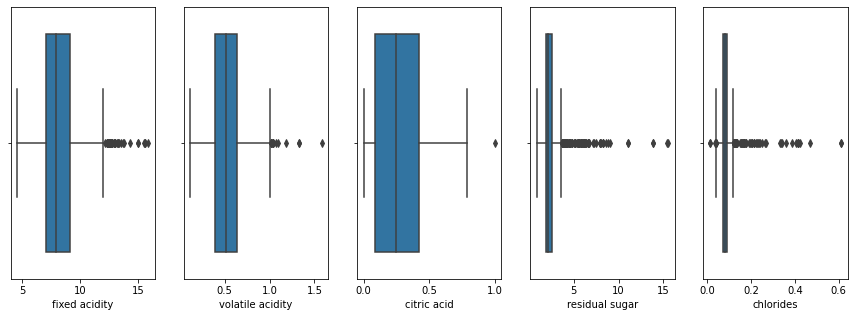

In [69]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']
fig, axs = plt.subplots(ncols=len(cols), figsize=(15,5))
for i, col in enumerate(cols):
    sns.boxplot(x=wine_data[col], ax=axs[i])
plt.show

In [70]:

Q1 = wine_data[['residual sugar','fixed acidity','volatile acidity','chlorides']].quantile(0.25)
Q3 = wine_data[['residual sugar','fixed acidity','volatile acidity','chlorides']].quantile(0.75)
print('Q1',Q1)
print('Q3',Q3)

Q1 residual sugar      1.9000
fixed acidity       7.1000
volatile acidity    0.3925
chlorides           0.0700
Name: 0.25, dtype: float64
Q3 residual sugar      2.60
fixed acidity       9.10
volatile acidity    0.64
chlorides           0.09
Name: 0.75, dtype: float64


In [71]:
IQR  = Q3 - Q1
print('IQR',round(IQR,2))

IQR residual sugar      0.70
fixed acidity       2.00
volatile acidity    0.25
chlorides           0.02
dtype: float64


In [72]:
lower_limit = Q1 - 1.5 * IQR 
upper_limit = Q3 + 1.5 * IQR

In [73]:
wine_data = wine_data[~((wine_data.loc[:,['residual sugar','fixed acidity','volatile acidity','chlorides']] < lower_limit) | (wine_data.loc[:,['residual sugar','fixed acidity','volatile acidity','chlorides']] > upper_limit)).any(axis=1)]

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [75]:
X = wine_data.drop("quality", axis=1)
y = wine_data["quality"]

In [76]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Select top k features using chi-square test
k = 5
selector = SelectKBest(score_func=chi2, k=k)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
model = DecisionTreeRegressor(criterion="absolute_error", max_depth=5)
model.fit(X_train, y_train)


DecisionTreeRegressor(criterion='absolute_error', max_depth=5)

In [80]:

# Predict wine quality on the training set
y_pred_train = model.predict(X_train)

In [81]:
mse = mean_squared_error( y_train,y_pred_train)
print('decision tree regression: ', mse)

decision tree regression:  0.4027027027027027


In [82]:
y_pred = model.predict(X_test)

In [83]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.6243243243243243


In [84]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [42]
}

In [85]:
# Create a Decision Tree Regression model
dtree_reg = DecisionTreeRegressor()


In [86]:
# Apply Grid Search Cross Validation to find the best hyperparameters for the model
grid_search = GridSearchCV(dtree_reg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [42]})

In [87]:
# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_search.best_score_))


Best Hyperparameters: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 9, 'random_state': 42}
Best Mean Cross-validation score: 0.27


In [88]:
model = DecisionTreeRegressor(criterion="absolute_error", max_depth=5)
model.fit(X_train, y_train)


DecisionTreeRegressor(criterion='absolute_error', max_depth=5)

In [89]:

# Predict wine quality on the training set
y_pred_train = model.predict(X_train)

In [90]:
mse = mean_squared_error( y_train,y_pred_train)
print('decision tree regression: ', mse)

decision tree regression:  0.4047297297297297


In [91]:
y_pred = model.predict(X_test)

In [92]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.6243243243243243


In [93]:
from sklearn.feature_selection import chi2

In [94]:
chi2_scores, p_values = chi2(X_train_selected, y_train)

In [95]:
# Compute the chi-square statistic and p-values for each feature

chi2_scores, p_values = chi2(X_train_selected,y_train)

In [96]:
dt = DecisionTreeRegressor(criterion='chi2')
model.fit(X_train_selected, y_train)


DecisionTreeRegressor(criterion='absolute_error', max_depth=5)

In [97]:
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print("chi square : {:.2f}".format(mse))


chi square : 0.61
